In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [7]:
df = pd.read_csv('../dataset/TSLA.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2021-04-26,741.000000,749.299988,732.609985,738.200012,738.200012,31038500
247,2021-04-27,717.960022,724.000000,703.349976,704.739990,704.739990,29437000
248,2021-04-28,696.409973,708.500000,693.599976,694.400024,694.400024,22271000
249,2021-04-29,699.510010,702.250000,668.500000,677.000000,677.000000,28845400
250,2021-04-30,667.590027,715.469971,666.140015,709.440002,709.440002,40686400


In [3]:
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])

In [4]:
number_simulation = 100
predict_day = 30
returns = df.Close.pct_change()
volatility = returns.std()
results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        prices.append(prices[d] * (1 + np.random.normal(0, volatility)))
    results[i] = pd.Series(prices).values

100%|██████████| 100/100 [00:00<00:00, 298.02it/s]


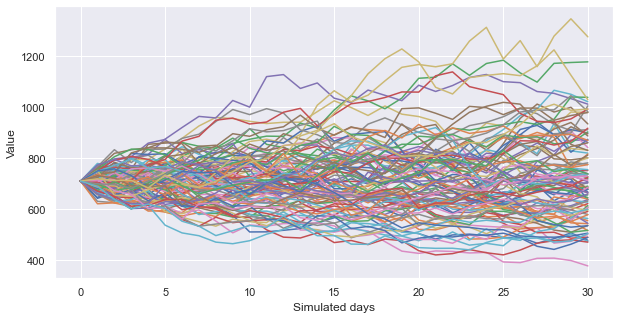

In [5]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

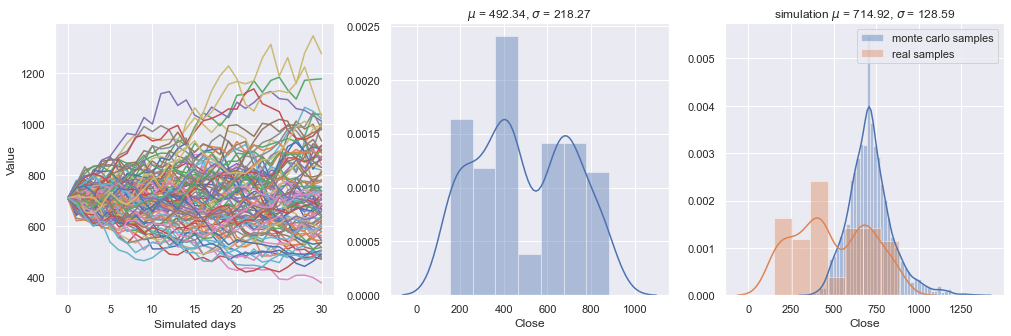

In [6]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()